In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_excel("2006.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2006,17624,227,31,3506
1,2006,17660,411,15,3564
2,2006,17605,356,39,3507
3,2006,17322,348,14,3517
4,2006,17825,257,36,3504
...,...,...,...,...,...
1985,2006,17729,16,15,3557
1986,2006,17942,306,37,3514
1987,2006,17402,102,39,3502
1988,2006,17808,414,20,3498


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1990, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1990 non-null   int64
 1   Maximum length (m))  1990 non-null   int64
 2   Recession(m),        1990 non-null   int64
 3   Rate/yr(m)           1990 non-null   int64
 4   Snout altitude (m)   1990 non-null   int64
dtypes: int64(5)
memory usage: 77.9 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1990


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2006,17624,227,31,3506
1,2006,17660,411,15,3564
2,2006,17605,356,39,3507
3,2006,17322,348,14,3517
4,2006,17825,257,36,3504


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0337,0.0396,-0.0582
"Recession(m),",NaN,-0.0337,1.0000,-0.0153,0.0011
Rate/yr(m),NaN,0.0396,-0.0153,1.0000,0.0244
Snout altitude (m),NaN,-0.0582,0.0011,0.0244,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0396
Recession(m),         -0.0337
Snout altitude (m)    -0.0582
Year                      NaN
Name: Maximum length (m)), dtype: float64

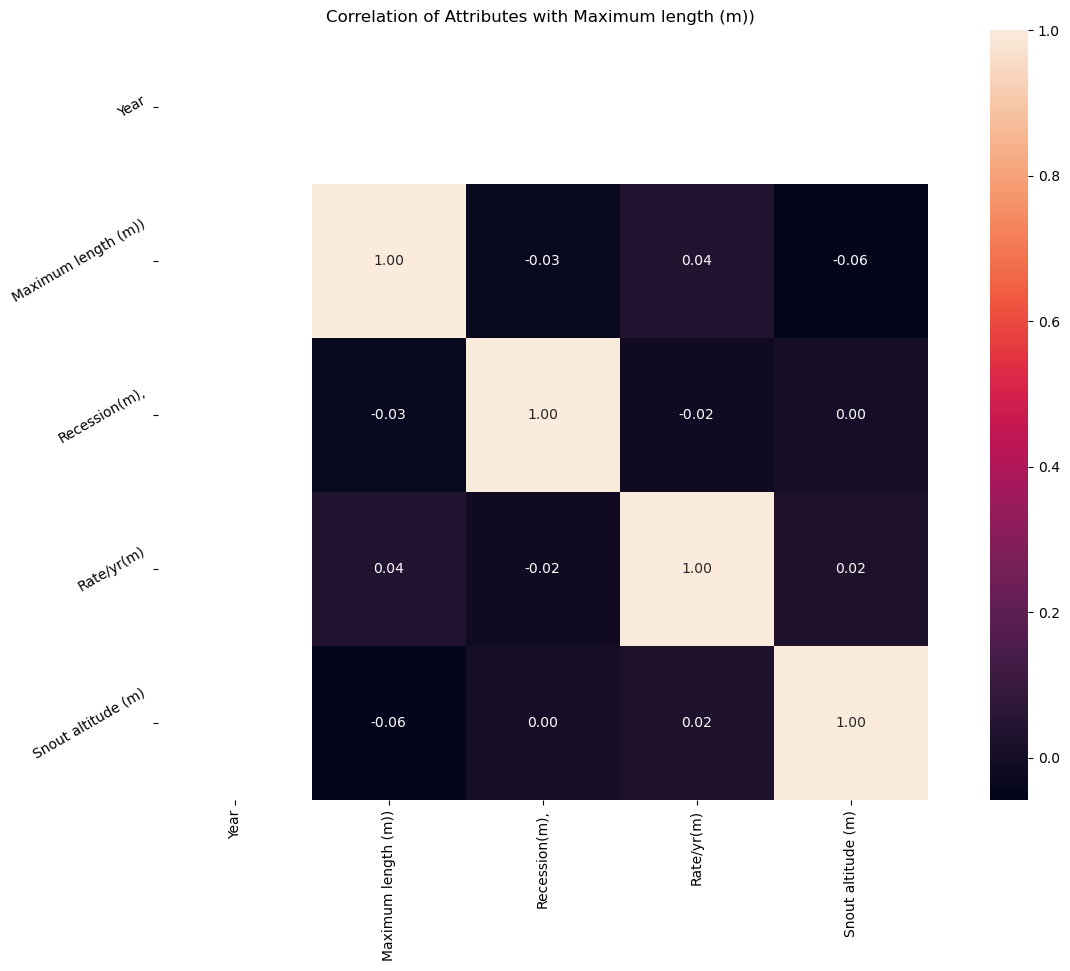

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,990.0000","1,990.0000","1,990.0000","1,990.0000","1,990.0000"
mean,"2,006.0000","17,555.9678",219.5397,27.8553,"3,533.2025"
std,0.0000,297.0442,127.3597,8.6610,20.8895
min,"2,006.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,006.0000","17,301.0000",114.0000,20.0000,"3,515.0000"
50%,"2,006.0000","17,559.5000",216.0000,28.0000,"3,534.0000"
75%,"2,006.0000","17,816.7500",334.0000,36.0000,"3,552.0000"
max,"2,006.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2006   1.0000
Name: Year, dtype: float64

3     0.0055
77    0.0055
161   0.0055
173   0.0050
334   0.0050
       ...  
407   0.0005
140   0.0005
341   0.0005
164   0.0005
263   0.0005
Name: Recession(m),, Length: 438, dtype: float64

39   0.0402
38   0.0397
36   0.0387
28   0.0387
31   0.0372
25   0.0362
32   0.0362
18   0.0352
34   0.0352
16   0.0352
13   0.0352
27   0.0352
40   0.0347
15   0.0347
42   0.0342
37   0.0337
35   0.0332
24   0.0332
26   0.0327
33   0.0327
19   0.0327
23   0.0322
22   0.0312
41   0.0296
21   0.0291
20   0.0281
30   0.0271
14   0.0266
29   0.0261
17   0.0256
Name: Rate/yr(m), dtype: float64

3541   0.0206
3565   0.0206
3563   0.0196
3552   0.0181
3524   0.0176
        ...  
3513   0.0101
3538   0.0101
3521   0.0085
3530   0.0080
3496   0.0005
Name: Snout altitude (m), Length: 72, dtype: float64



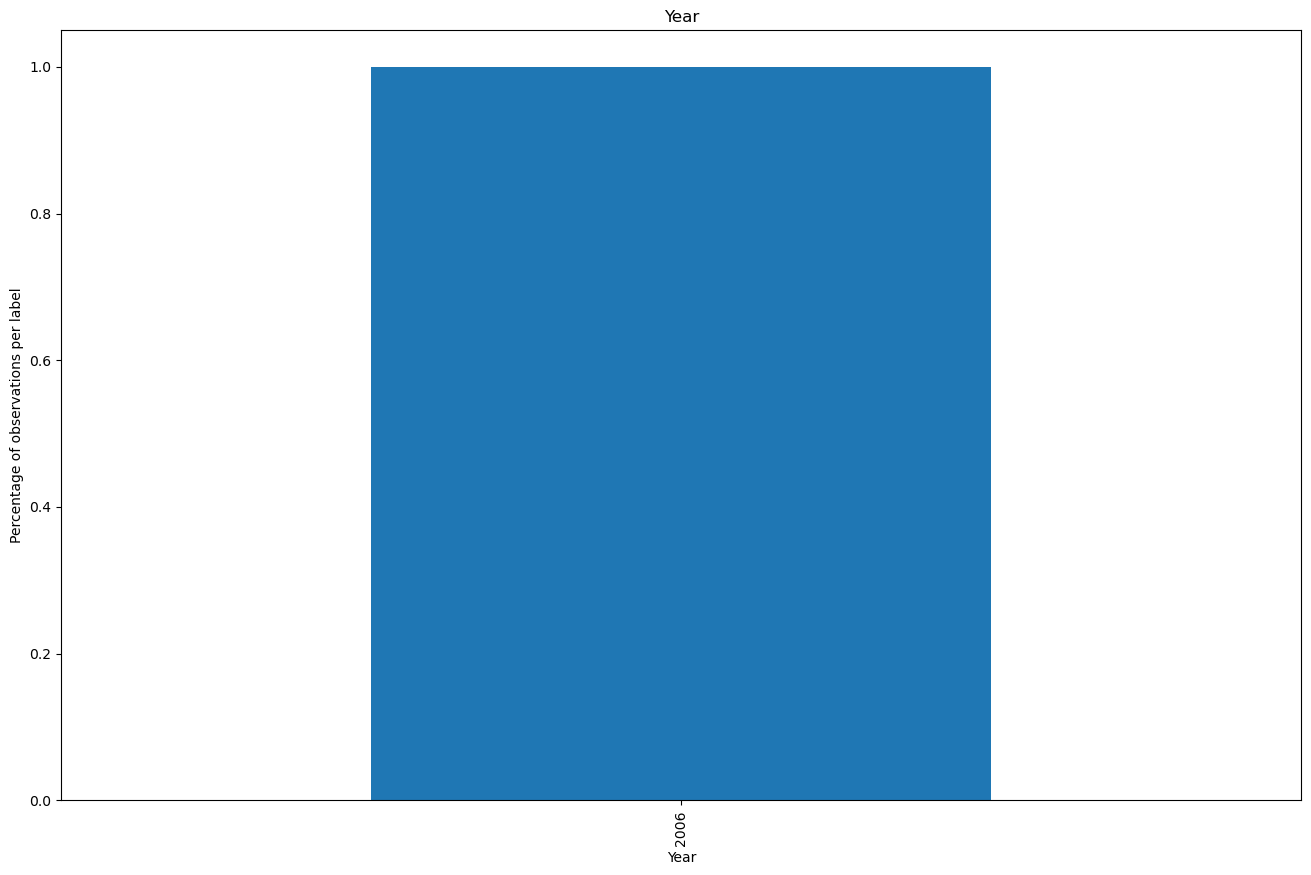

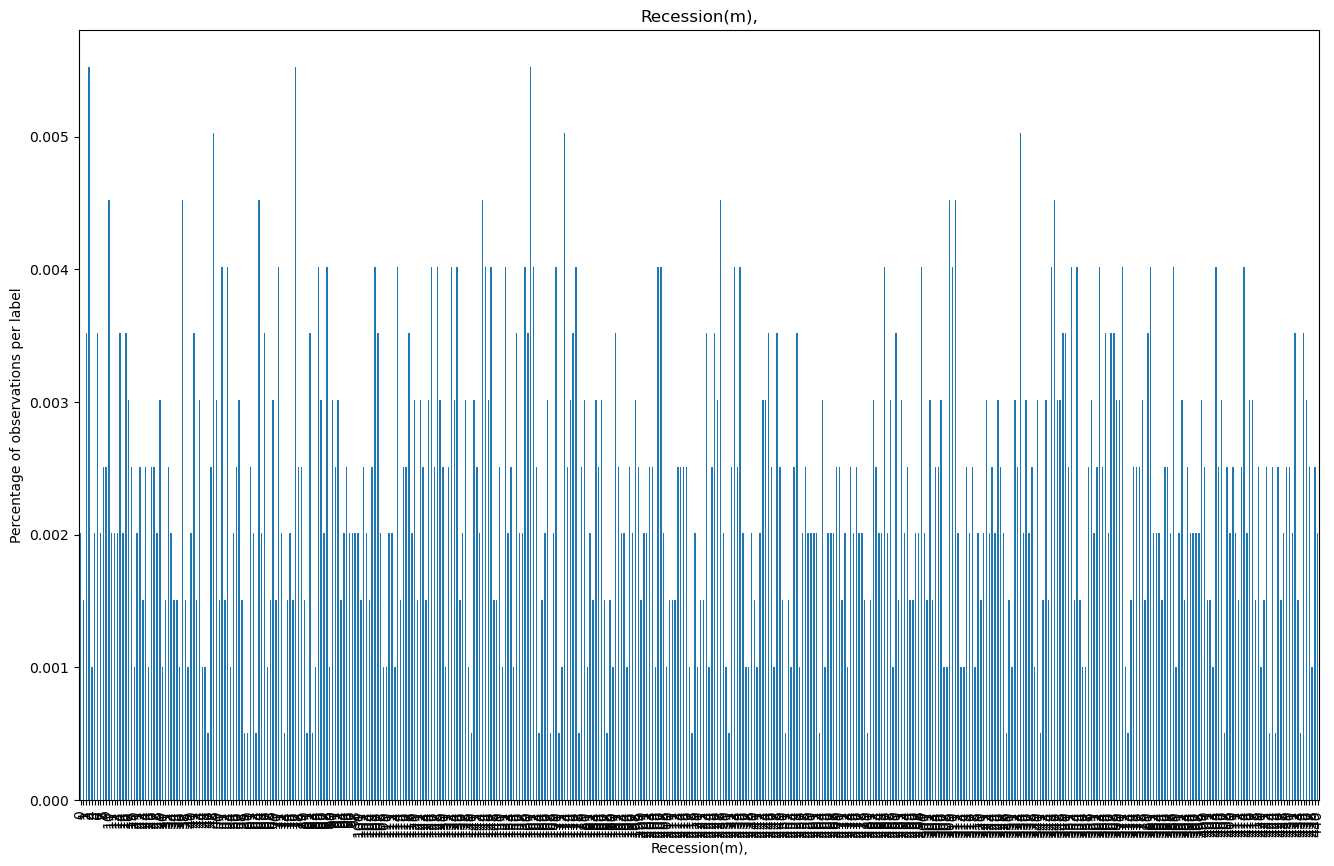

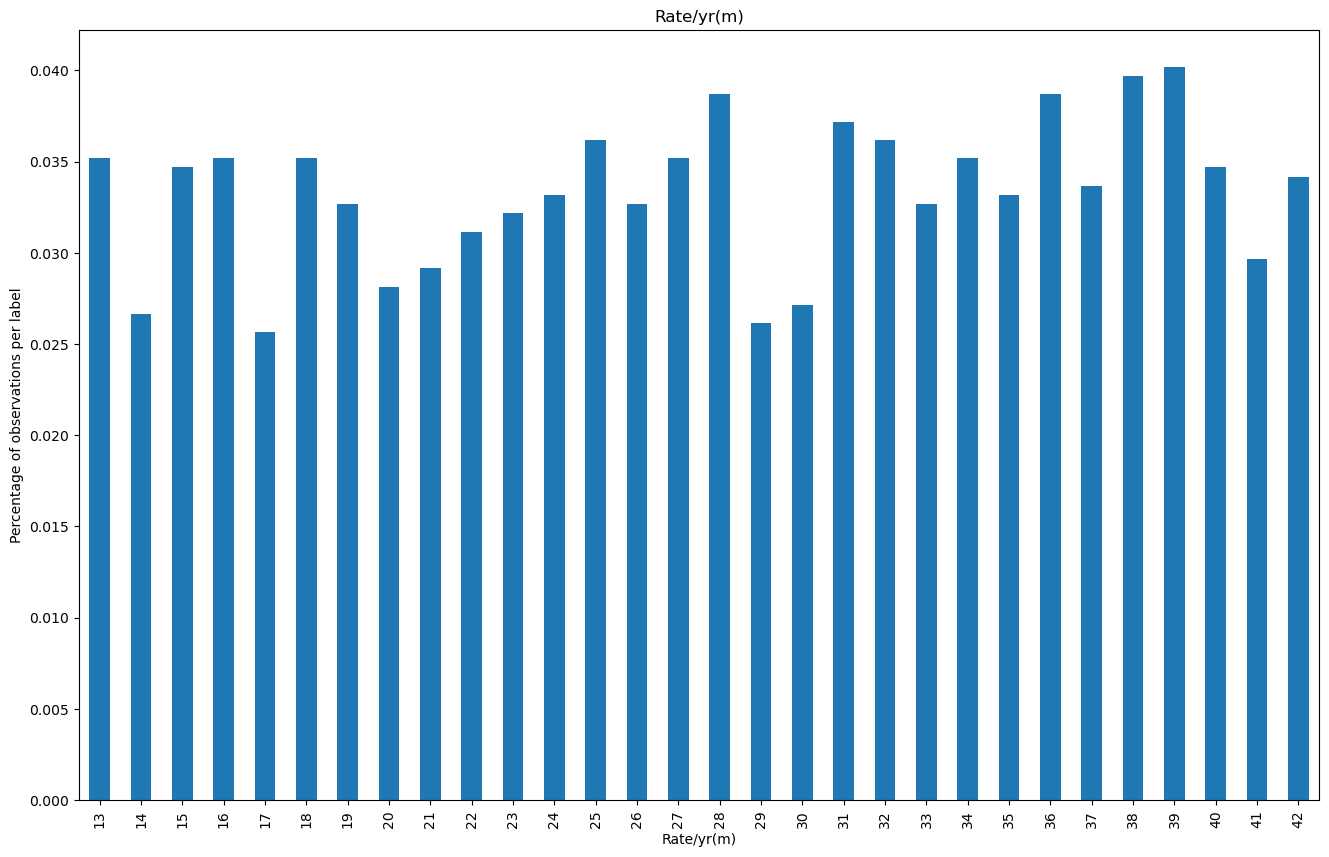

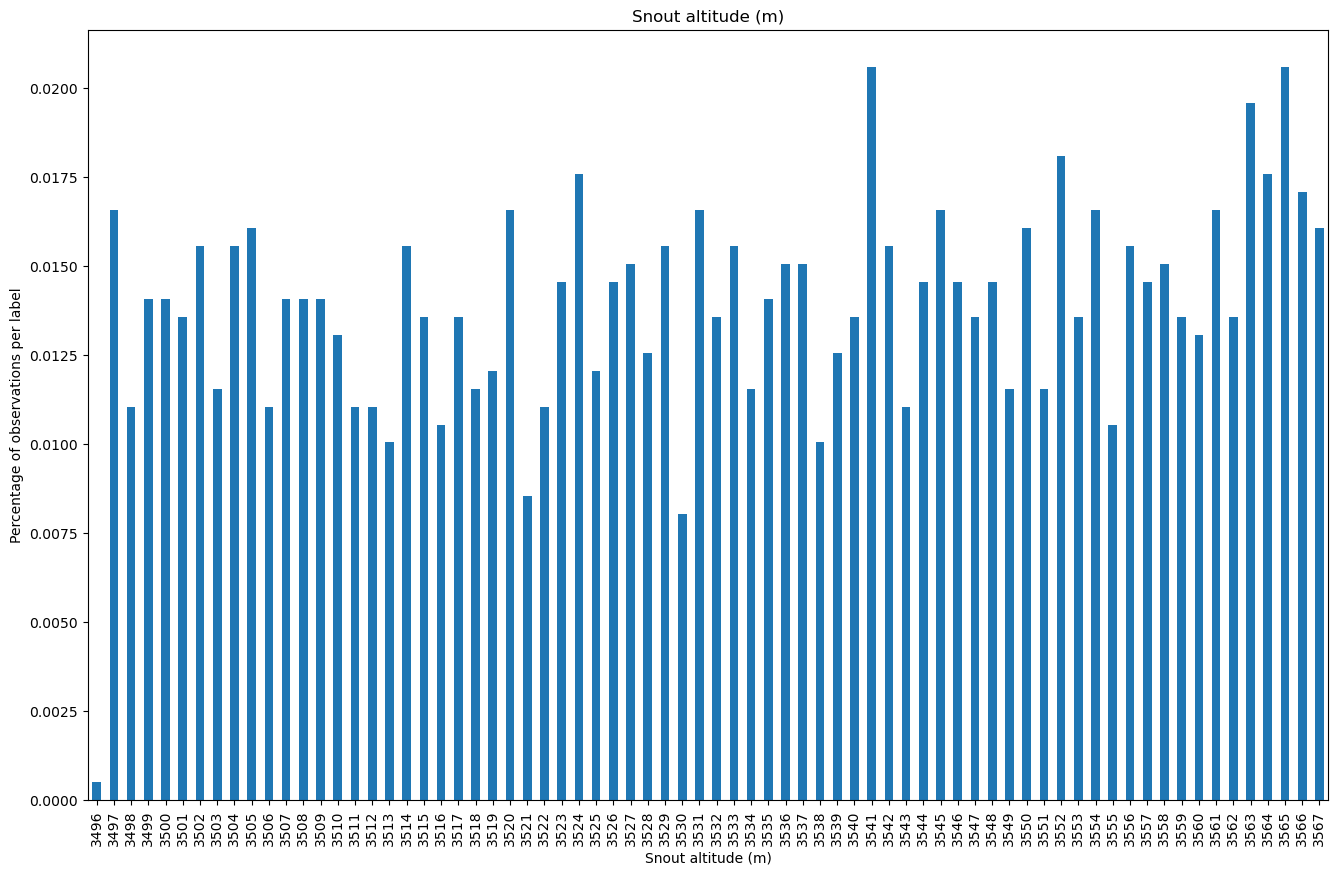

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()